In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import NaiveBayesModel,LogisticRegressionModel

# ---- Assume NaiveBayesModel is already implemented and imported ---- #
# from naive_bayes_model import NaiveBayesModel

from sklearn.datasets import fetch_openml
data = fetch_openml("adult", version=2, as_frame=True)
X = data.data.select_dtypes(include=[int, float])  # drop categoricals for simplicity
y = (data.target == ">50K").astype(int)  # binary labels


# # Wrap X and y into (x, y) tuples
def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# # Load dataset
# iris = load_breast_cancer()
# X, y = iris.data, iris.target

# # Binary classification only for this simple example
# X = X[y != 2]
# y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train, y_train)
test_data = wrap_data(X_test, y_test)

# Train model
model = LogisticRegressionModel()
model.fit(train_data, test_data)

# Plot accuracy over iterations
scores = model.get_all_scores()
accuracies = [score['recall'] for score in scores]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy over Batches")
plt.xlabel("Batch Number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: LogisticRegressionModel.__init__() missing 2 required positional arguments: 'start' and 'stop'

In [4]:
train_data

[(array([4.8, 3.4, 1.6, 0.2]), np.int64(0)),
 (array([4.6, 3.2, 1.4, 0.2]), np.int64(0)),
 (array([6. , 3.4, 4.5, 1.6]), np.int64(1)),
 (array([5.2, 3.4, 1.4, 0.2]), np.int64(0)),
 (array([5. , 2.3, 3.3, 1. ]), np.int64(1)),
 (array([5.4, 3.9, 1.7, 0.4]), np.int64(0)),
 (array([5.6, 3. , 4.5, 1.5]), np.int64(1)),
 (array([6.7, 3.1, 4.4, 1.4]), np.int64(1)),
 (array([5. , 3.2, 1.2, 0.2]), np.int64(0)),
 (array([5.4, 3.9, 1.3, 0.4]), np.int64(0)),
 (array([5. , 3.3, 1.4, 0.2]), np.int64(0)),
 (array([4.9, 3.1, 1.5, 0.2]), np.int64(0)),
 (array([5. , 3.4, 1.5, 0.2]), np.int64(0)),
 (array([5.7, 3. , 4.2, 1.2]), np.int64(1)),
 (array([5.2, 3.5, 1.5, 0.2]), np.int64(0)),
 (array([5.1, 3.8, 1.5, 0.3]), np.int64(0)),
 (array([5.5, 2.4, 3.7, 1. ]), np.int64(1)),
 (array([5. , 3. , 1.6, 0.2]), np.int64(0)),
 (array([6. , 2.2, 4. , 1. ]), np.int64(1)),
 (array([4.3, 3. , 1.1, 0.1]), np.int64(0)),
 (array([4.8, 3.4, 1.9, 0.2]), np.int64(0)),
 (array([4.6, 3.1, 1.5, 0.2]), np.int64(0)),
 (array([5

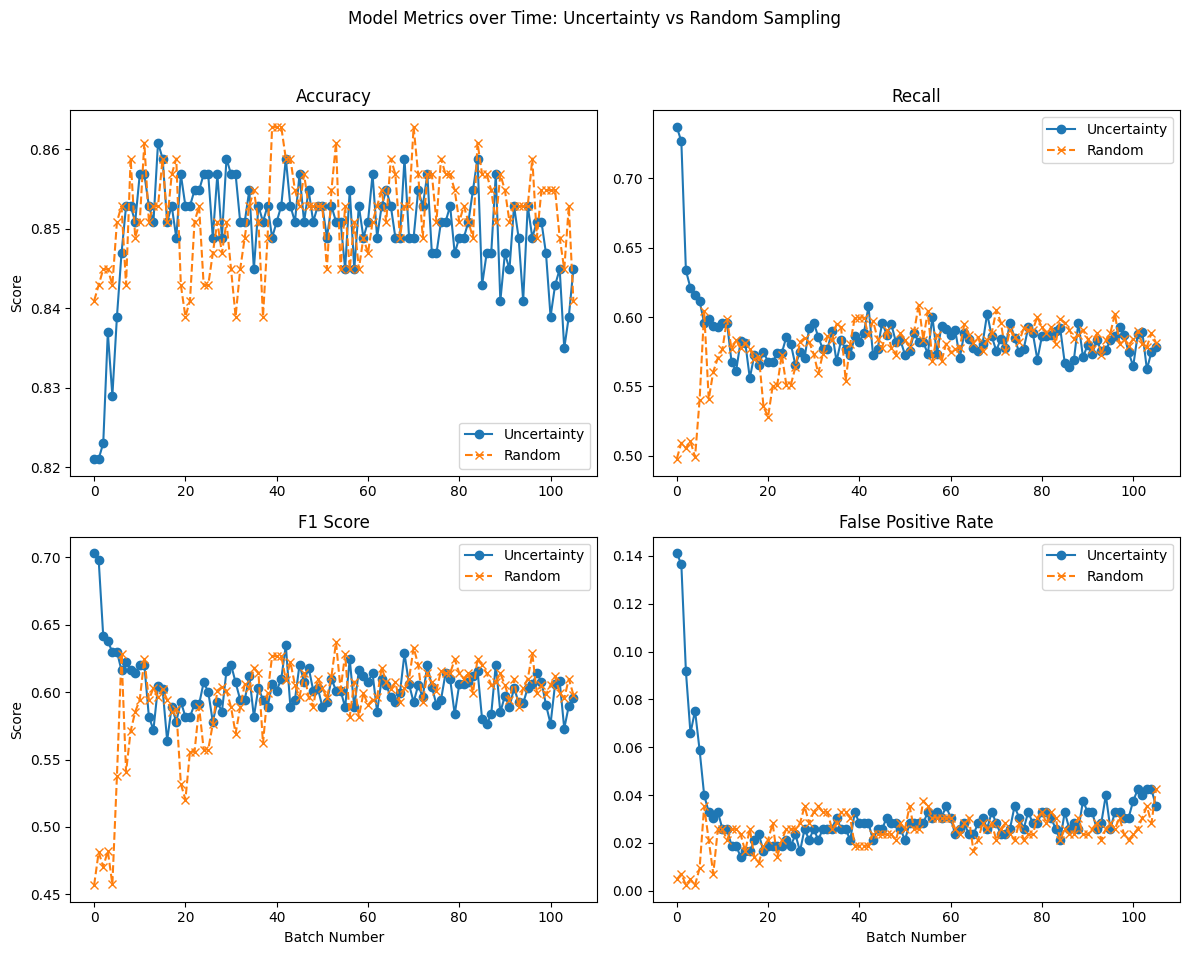

In [2]:
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel
import pandas as pd
# Load dataset and split into train/test
data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)
# # Create train/test tuples
# train = list(zip(X_train, y_train))
# test = list(zip(X_test, y_test))

# Initialize and train the model
model = RandomForestClassifierModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "uncertainty")

# Get the model's performance scores
scores_uncertainty = model.scores
model = RandomForestClassifierModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "random")

scores_random = model.scores
# Display the scores at each batch
accuracies_unc = [s['accuracy'] for s in scores_uncertainty]
recalls_unc = [s['recall'] for s in scores_uncertainty]
f1s_unc = [s['f1'] for s in scores_uncertainty]
fprs_unc = [s['false_positive_rate'] for s in scores_uncertainty]

accuracies_rnd = [s['accuracy'] for s in scores_random]
recalls_rnd = [s['recall'] for s in scores_random]
f1s_rnd = [s['f1'] for s in scores_random]
fprs_rnd = [s['false_positive_rate'] for s in scores_random]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Metrics over Time: Uncertainty vs Random Sampling')

# Accuracy
axs[0, 0].plot(accuracies_unc, label='Uncertainty', marker='o')
axs[0, 0].plot(accuracies_rnd, label='Random', linestyle='--', marker='x')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()

# Recall
axs[0, 1].plot(recalls_unc, label='Uncertainty', marker='o')
axs[0, 1].plot(recalls_rnd, label='Random', linestyle='--', marker='x')
axs[0, 1].set_title('Recall')
axs[0, 1].legend()

# F1
axs[1, 0].plot(f1s_unc, label='Uncertainty', marker='o')
axs[1, 0].plot(f1s_rnd, label='Random', linestyle='--', marker='x')
axs[1, 0].set_title('F1 Score')
axs[1, 0].set_xlabel('Batch Number')
axs[1, 0].set_ylabel('Score')
axs[1, 0].legend()

# False Positive Rate
axs[1, 1].plot(fprs_unc, label='Uncertainty', marker='o')
axs[1, 1].plot(fprs_rnd, label='Random', linestyle='--', marker='x')
axs[1, 1].set_title('False Positive Rate')
axs[1, 1].set_xlabel('Batch Number')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust space for suptitle
plt.show()

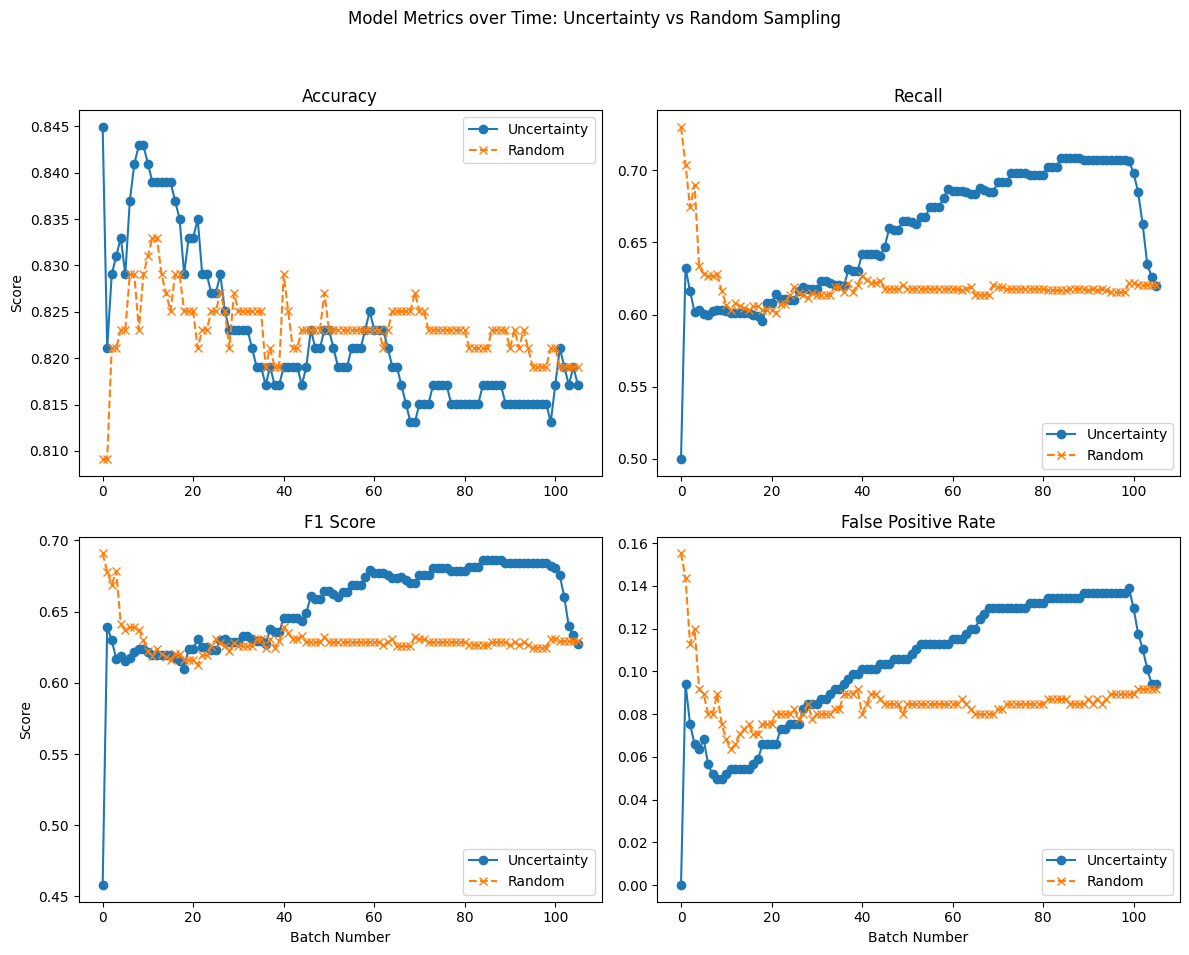

In [2]:
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel, NaiveBayesModel
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and split into train/test
data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)
# # Create train/test tuples
# train = list(zip(X_train, y_train))
# test = list(zip(X_test, y_test))

# Initialize and train the model
model = NaiveBayesModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "uncertainty")

# Get the model's performance scores
scores_uncertainty = model.scores
model = NaiveBayesModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "random")

scores_random = model.scores
# Display the scores at each batch
accuracies_unc = [s['accuracy'] for s in scores_uncertainty]
recalls_unc = [s['recall'] for s in scores_uncertainty]
f1s_unc = [s['f1'] for s in scores_uncertainty]
fprs_unc = [s['false_positive_rate'] for s in scores_uncertainty]

accuracies_rnd = [s['accuracy'] for s in scores_random]
recalls_rnd = [s['recall'] for s in scores_random]
f1s_rnd = [s['f1'] for s in scores_random]
fprs_rnd = [s['false_positive_rate'] for s in scores_random]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Metrics over Time: Uncertainty vs Random Sampling')

# Accuracy
axs[0, 0].plot(accuracies_unc, label='Uncertainty', marker='o')
axs[0, 0].plot(accuracies_rnd, label='Random', linestyle='--', marker='x')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()

# Recall
axs[0, 1].plot(recalls_unc, label='Uncertainty', marker='o')
axs[0, 1].plot(recalls_rnd, label='Random', linestyle='--', marker='x')
axs[0, 1].set_title('Recall')
axs[0, 1].legend()

# F1
axs[1, 0].plot(f1s_unc, label='Uncertainty', marker='o')
axs[1, 0].plot(f1s_rnd, label='Random', linestyle='--', marker='x')
axs[1, 0].set_title('F1 Score')
axs[1, 0].set_xlabel('Batch Number')
axs[1, 0].set_ylabel('Score')
axs[1, 0].legend()

# False Positive Rate
axs[1, 1].plot(fprs_unc, label='Uncertainty', marker='o')
axs[1, 1].plot(fprs_rnd, label='Random', linestyle='--', marker='x')
axs[1, 1].set_title('False Positive Rate')
axs[1, 1].set_xlabel('Batch Number')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust space for suptitle
plt.show()

/home/lpanjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lpanjal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

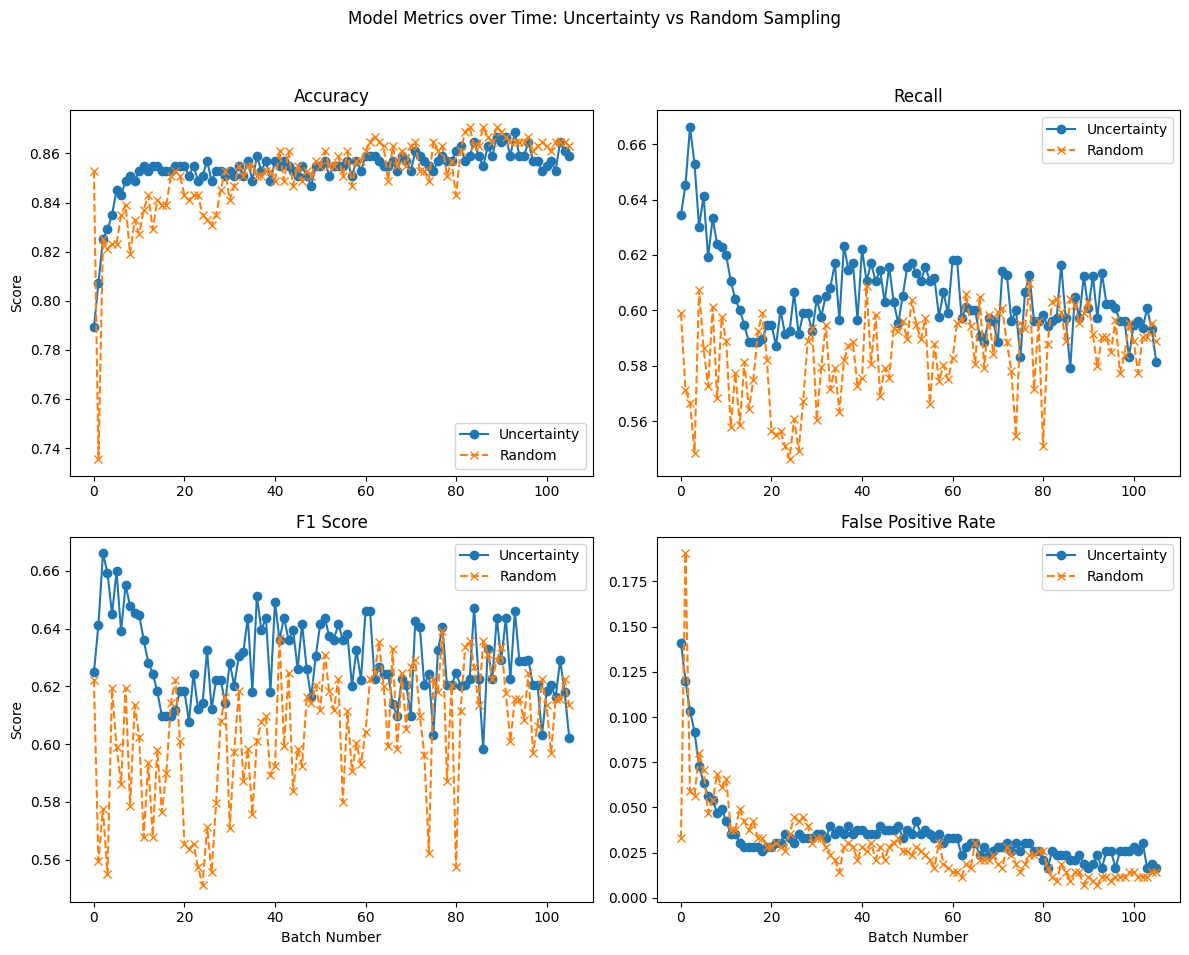

In [3]:
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel, NaiveBayesModel, LogisticRegressionModel
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and split into train/test
data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)
# # Create train/test tuples
# train = list(zip(X_train, y_train))
# test = list(zip(X_test, y_test))

# Initialize and train the model
model = LogisticRegressionModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "uncertainty")

# Get the model's performance scores
scores_uncertainty = model.scores
model = LogisticRegressionModel(batch_per=0.01)
model.fit(train_data, test_data,sample = "random")

scores_random = model.scores
# Display the scores at each batch
accuracies_unc = [s['accuracy'] for s in scores_uncertainty]
recalls_unc = [s['recall'] for s in scores_uncertainty]
f1s_unc = [s['f1'] for s in scores_uncertainty]
fprs_unc = [s['false_positive_rate'] for s in scores_uncertainty]

accuracies_rnd = [s['accuracy'] for s in scores_random]
recalls_rnd = [s['recall'] for s in scores_random]
f1s_rnd = [s['f1'] for s in scores_random]
fprs_rnd = [s['false_positive_rate'] for s in scores_random]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Metrics over Time: Uncertainty vs Random Sampling')

# Accuracy
axs[0, 0].plot(accuracies_unc, label='Uncertainty', marker='o')
axs[0, 0].plot(accuracies_rnd, label='Random', linestyle='--', marker='x')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()

# Recall
axs[0, 1].plot(recalls_unc, label='Uncertainty', marker='o')
axs[0, 1].plot(recalls_rnd, label='Random', linestyle='--', marker='x')
axs[0, 1].set_title('Recall')
axs[0, 1].legend()

# F1
axs[1, 0].plot(f1s_unc, label='Uncertainty', marker='o')
axs[1, 0].plot(f1s_rnd, label='Random', linestyle='--', marker='x')
axs[1, 0].set_title('F1 Score')
axs[1, 0].set_xlabel('Batch Number')
axs[1, 0].set_ylabel('Score')
axs[1, 0].legend()

# False Positive Rate
axs[1, 1].plot(fprs_unc, label='Uncertainty', marker='o')
axs[1, 1].plot(fprs_rnd, label='Random', linestyle='--', marker='x')
axs[1, 1].set_title('False Positive Rate')
axs[1, 1].set_xlabel('Batch Number')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust space for suptitle
plt.show()

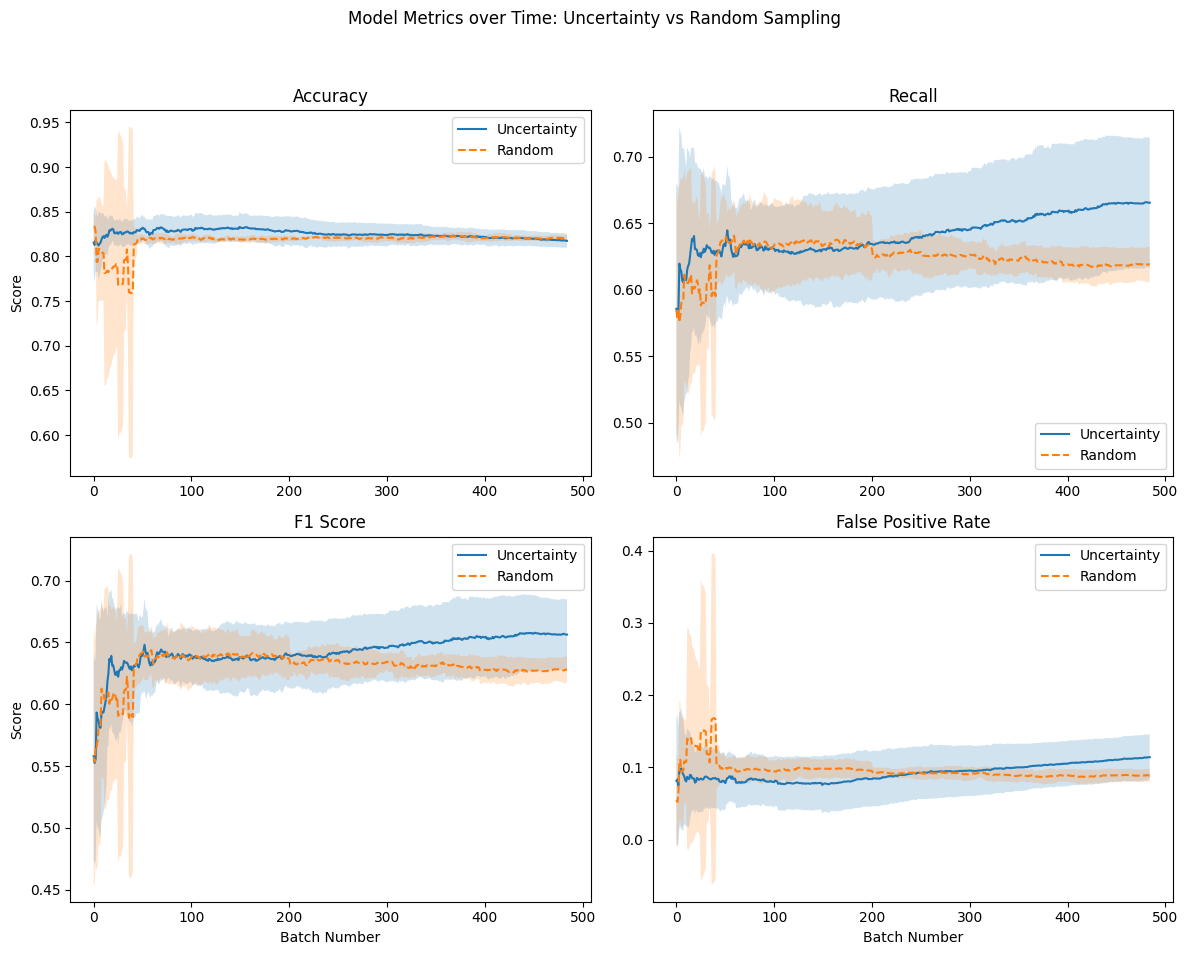

In [11]:
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel, NaiveBayesModel, LogisticRegressionModel
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and split into train/test
# Load dataset and split into train/test
data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)

# Number of repeats
num_repeats = 10

# Initialize lists to hold metrics for each repeat
accuracies_unc = []
recalls_unc = []
f1s_unc = []
fprs_unc = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="uncertainty")
    scores_uncertainty = model.scores

    # Train with random sampling
    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="random")
    scores_random = model.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_unc.append([s['accuracy'] for s in scores_uncertainty])
    recalls_unc.append([s['recall'] for s in scores_uncertainty])
    f1s_unc.append([s['f1'] for s in scores_uncertainty])
    fprs_unc.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])

from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)


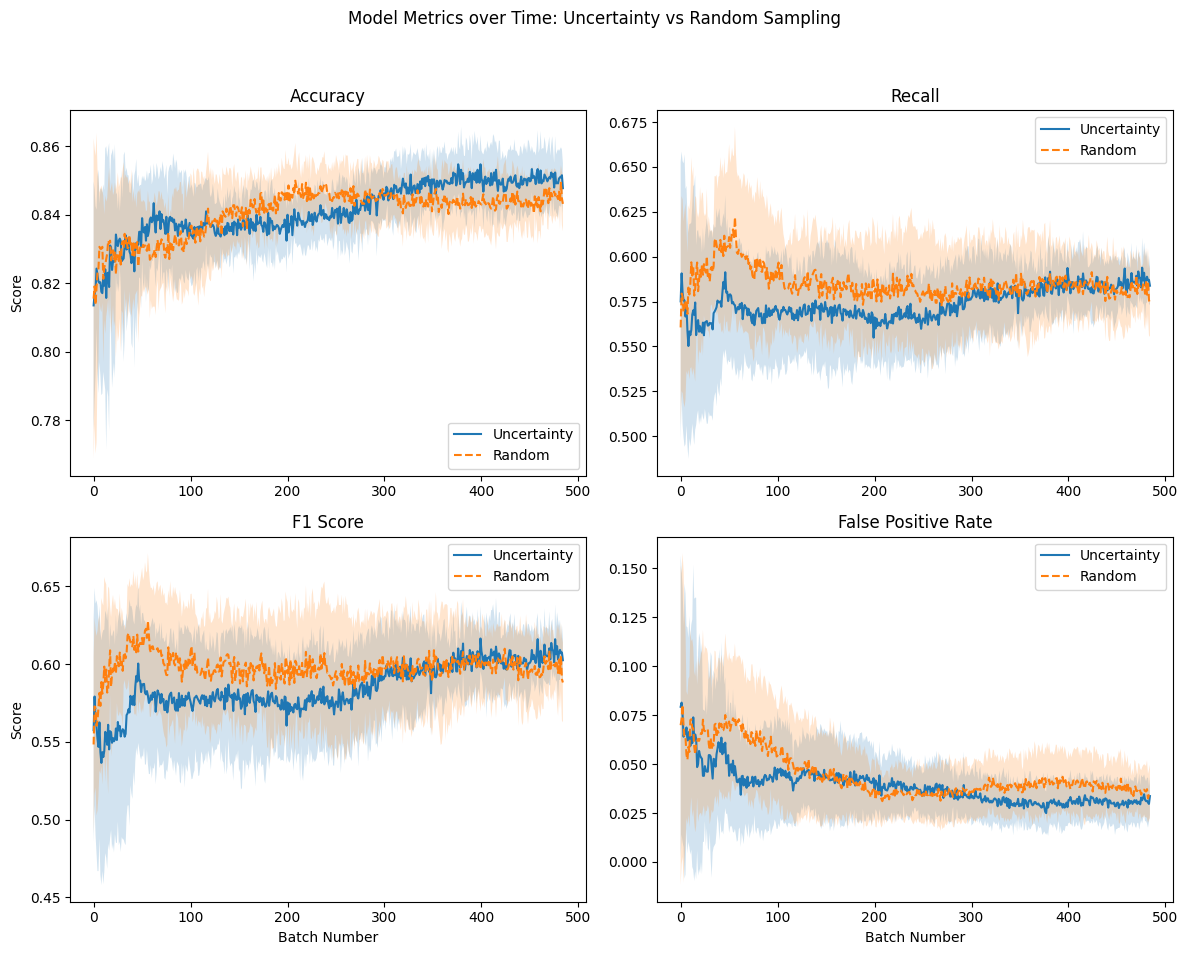

In [12]:
# Load dataset and split into train/test
# Load dataset and split into train/test
from src.models import RandomForestClassifierModel, NaiveBayesModel, LogisticRegressionModel

data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)

# Number of repeats
num_repeats = 10

# Initialize lists to hold metrics for each repeat
accuracies_unc = []
recalls_unc = []
f1s_unc = []
fprs_unc = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model = RandomForestClassifierModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="uncertainty")
    scores_uncertainty = model.scores

    # Train with random sampling
    model = RandomForestClassifierModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="random")
    scores_random = model.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_unc.append([s['accuracy'] for s in scores_uncertainty])
    recalls_unc.append([s['recall'] for s in scores_uncertainty])
    f1s_unc.append([s['f1'] for s in scores_uncertainty])
    fprs_unc.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])

from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)


In [ ]:
# Load dataset and split into train/test
# Load dataset and split into train/test
from src.models import RandomForestClassifierModel, NaiveBayesModel, LogisticRegressionModel
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)

# Number of repeats
num_repeats = 10

# Initialize lists to hold metrics for each repeat
accuracies_unc = []
recalls_unc = []
f1s_unc = []
fprs_unc = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model = LogisticRegressionModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="uncertainty")
    scores_uncertainty = model.scores

    # Train with random sampling
    model = LogisticRegressionModel(start=16, stop=500, batch_per=0.0)
    model.fit(train_data, test_data, sample="random")
    scores_random = model.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_unc.append([s['accuracy'] for s in scores_uncertainty])
    recalls_unc.append([s['recall'] for s in scores_uncertainty])
    f1s_unc.append([s['f1'] for s in scores_uncertainty])
    fprs_unc.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])

from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)

In [1]:
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel, NaiveBayesModel, LogisticRegressionModel
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and split into train/test
# Load dataset and split into train/test
data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Defect'])
y = data['Defect']


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train,y_train)
test_data = wrap_data(X_test,y_test)

# Number of repeats
num_repeats = 20

# Initialize lists to hold metrics for each repeat
accuracies_ent = []
recalls_ent = []
f1s_ent = []
fprs_ent = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

accuracies_eu = []
recalls_eu = []
f1s_eu = []
fprs_eu = []

accuracies_au = []
recalls_au = []
f1s_au = []
fprs_au = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit_1(train_data, test_data, sample="uncertainty")
    scores_uncertainty = model.scores

    # Train with random sampling
    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit_1(train_data, test_data, sample="random")
    scores_random = model.scores

    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit_2(train_data, test_data, uncertainty="epistemic")
    scores_epistemic = model.scores

    model = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model.fit_2(train_data, test_data, uncertainty="aleatoric")
    scores_aleatoric = model.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_ent.append([s['accuracy'] for s in scores_uncertainty])
    recalls_ent.append([s['recall'] for s in scores_uncertainty])
    f1s_ent.append([s['f1'] for s in scores_uncertainty])
    fprs_ent.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])

    accuracies_eu.append([s['accuracy'] for s in scores_random])
    recalls_eu.append([s['recall'] for s in scores_random])
    f1s_eu.append([s['f1'] for s in scores_random])
    fprs_eu.append([s['false_positive_rate'] for s in scores_random])

    accuracies_au.append([s['accuracy'] for s in scores_random])
    recalls_au.append([s['recall'] for s in scores_random])
    f1s_au.append([s['f1'] for s in scores_random])
    fprs_au.append([s['false_positive_rate'] for s in scores_random])

from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (17,) + inhomogeneous part.

In [ ]:
from sklearn.model_selection import train_test_split
from src.models2 import UncertForest
from src.models import RandomForestClassifierModel
import pandas as pd

data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Index','Defect'])
y = data['Defect']



# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = X_train.copy()
train_data['Defect'] = y_train

test_data = X_test.copy()
test_data['Defect'] = y_test


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))


train_data1 = wrap_data(X_train,y_train)
test_data1 = wrap_data(X_test,y_test)


# print(test_data)

# Initialize and train the model


num_repeats = 10

# Initialize lists to hold metrics for each repeat
accuracies_unc = []
recalls_unc = []
f1s_unc = []
fprs_unc = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model1 = UncertForest(start=100, stop=300, batch_per=0.0)
    model1.fit(train_data, test_data)
    scores_uncertainty = model1.scores

    # Train with random sampling
    model2 = RandomForestClassifierModel(start=100, stop=300, batch_per=0.0)
    model2.fit(train_data1, test_data1, sample="random")
    scores_random = model2.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_unc.append([s['accuracy'] for s in scores_uncertainty])
    recalls_unc.append([s['recall'] for s in scores_uncertainty])
    f1s_unc.append([s['f1'] for s in scores_uncertainty])
    fprs_unc.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])


from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)


TypeError: plot_model_metrics() missing 7 required positional arguments: 'recalls_eu', 'f1s_eu', 'fprs_eu', 'accuracies_au', 'recalls_au', 'f1s_au', and 'fprs_au'

The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


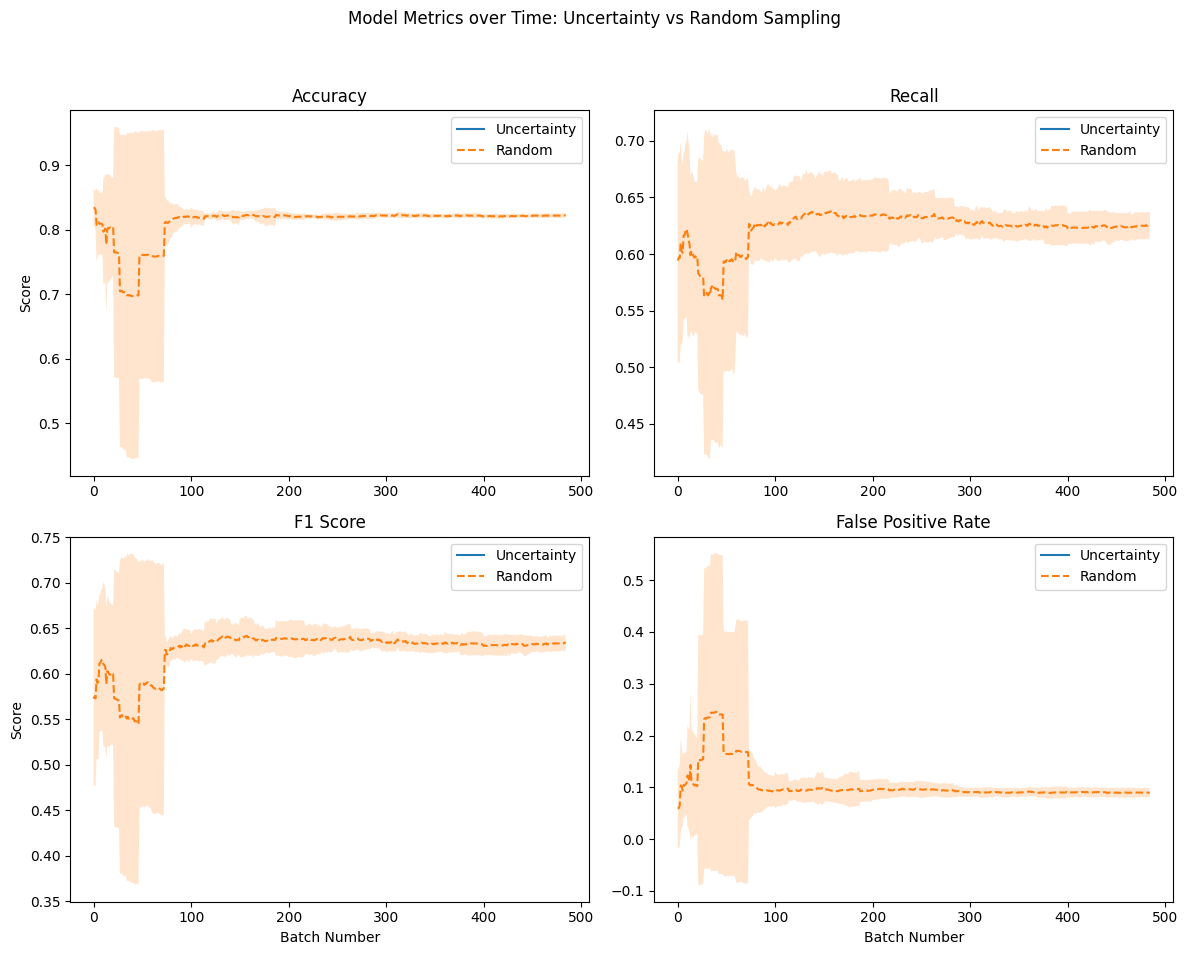

In [1]:
from sklearn.model_selection import train_test_split
from src.models3 import NBActiveLearner
from src.models import NaiveBayesModel
import pandas as pd

data = pd.read_csv('data/table/NASA.csv')
X = data.drop(columns=['Index','Defect'])
y = data['Defect']


# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = X_train.copy()
train_data['Defect'] = y_train

test_data = X_test.copy()
test_data['Defect'] = y_test


def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))


train_data1 = wrap_data(X_train,y_train)
test_data1 = wrap_data(X_test,y_test)


# print(test_data)

# Initialize and train the model


num_repeats = 10

# Initialize lists to hold metrics for each repeat
accuracies_unc = []
recalls_unc = []
f1s_unc = []
fprs_unc = []

accuracies_rnd = []
recalls_rnd = []
f1s_rnd = []
fprs_rnd = []

# Run the experiment multiple times
for _ in range(num_repeats):
    # Train with uncertainty sampling
    model1 = NBActiveLearner(start=16, stop=500, batch_per=0.0)
    model1.fit(train_data, test_data)
    scores_uncertainty = model1.scores

    # Train with random sampling
    model2 = NaiveBayesModel(start=16, stop=500, batch_per=0.0)
    model2.fit(train_data1, test_data1, sample="random")
    scores_random = model2.scores

    # Append metrics for both uncertainty and random sampling
    accuracies_unc.append([s['accuracy'] for s in scores_uncertainty])
    recalls_unc.append([s['recall'] for s in scores_uncertainty])
    f1s_unc.append([s['f1'] for s in scores_uncertainty])
    fprs_unc.append([s['false_positive_rate'] for s in scores_uncertainty])

    accuracies_rnd.append([s['accuracy'] for s in scores_random])
    recalls_rnd.append([s['recall'] for s in scores_random])
    f1s_rnd.append([s['f1'] for s in scores_random])
    fprs_rnd.append([s['false_positive_rate'] for s in scores_random])


from src.plotting import plot_model_metrics
plot_model_metrics(accuracies_unc,recalls_unc,f1s_unc,fprs_unc,accuracies_rnd, recalls_rnd,f1s_rnd, fprs_rnd, num_repeats)


NameError: name 'accuracies_unc' is not defined